In [82]:
import pandas as pd
news_df = pd.read_csv('data/news.csv')

In [ ]:
#Sentiment analysis model
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/roberta-large-financial-news-sentiment-en")
model = TFAutoModelForSequenceClassification.from_pretrained("Jean-Baptiste/roberta-large-financial-news-sentiment-en")

In [83]:
#Sumarization model
from transformers import pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

All model checkpoint layers were used when initializing TFBartForConditionalGeneration.

All the layers of TFBartForConditionalGeneration were initialized from the model checkpoint at facebook/bart-large-cnn.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBartForConditionalGeneration for predictions without further training.


In [172]:
#Test summarization on few apple news and keep news that are less than 512 tokens
AAPL_news_df = news_df[news_df['company'] == 'AAPL']
AAPL_news_df = AAPL_news_df[AAPL_news_df['text'].notna() & AAPL_news_df['text'].apply(lambda x: isinstance(x, str))].sample(1000)
APPL_sample_df = AAPL_news_df[AAPL_news_df['text'].apply(lambda x: len(tokenizer.tokenize(x)) < 512)]

APPL_sample_df

#Filter to keep only english news
#from langdetect import detect
#AAPL_news_df['lang'] = AAPL_news_df['text'].apply(detect)
#AAPL_news_df = AAPL_news_df[AAPL_news_df['lang'] != 'en']

,company,title,text,published
16863,AAPL,"She Will, film review — star turn from Alice K...",Watching the stylised horror movie <em>She Wil...,2022-07-21 16:00:07.564
16622,AAPL,Netflix names Microsoft as partner for ad-supp...,"""It's very early days and we have much to work...",2022-07-14 12:07:00.000
9774,AAPL,Apple Stays on Top for Phone Sales in China; C...,"Its nearest rival, Vivo, had a 17.8% market sh...",2021-12-31 10:09:00.000
10754,AAPL,Dow futures sink more than 400 points after Fe...,"During regular trading Wednesday, the Dow Jone...",2022-01-26 23:41:00.000
12754,AAPL,"EXCHANGE --- Business News: Porsche, Apple Hel...",Executives from Porsche traveled to the U.S. l...,2022-03-19 00:00:00.000
...,...,...,...,...
14608,AAPL,Business & Finance,Peloton recorded its biggest quarterly loss as...,2022-05-11 00:00:00.000
19439,AAPL,What's News: Business & Finance,U.S. retail sales stalled in September as the ...,2022-10-15 00:00:00.000
9870,AAPL,Business News: Apple Briefly Tops $3 Trillion,The move marked the latest milestone in a pand...,2022-01-04 00:00:00.000
18335,AAPL,'Buy your mom an iPhone': Tim Cook says Apple ...,"Texting from iPhone to iPhone uses iMessage, b...",2022-09-08 19:36:00.000


In [95]:
#Summarize news
APPL_sample_df['summary'] = APPL_sample_df['text'].apply(lambda x: x
                                                         if len(x) < 200  
                                                         else
                                                            summarizer(x, max_length=200, min_length=50, do_sample=False)[0]['summary_text'])

Your max_length is set to 200, but your input_length is only 72. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)


Your max_length is set to 200, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 200, but your input_length is only 49. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)
Your max_length is set to 200, but your input_length is only 50. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)
Your max_length is set to 200, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)
You

In [174]:
#Once we have the summary, we can use the sentiment analysis model to get the sentiment of the summary we classify the summary as positive or negative
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)
APPL_sample_df['sentiment'] = APPL_sample_df['text'].apply(lambda x: pipe(x)[0]['label'])

/var/folders/d9/q7rftjxx3pd2mksp5nhnv4b80000gn/T/ipykernel_2623/2149105231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  APPL_sample_df['sentiment'] = APPL_sample_df['text'].apply(lambda x: pipe(x)[0]['label'])


In [175]:
APPL_sample_df

,company,title,text,published,sentiment
16863,AAPL,"She Will, film review — star turn from Alice K...",Watching the stylised horror movie <em>She Wil...,2022-07-21 16:00:07.564,neutral
16622,AAPL,Netflix names Microsoft as partner for ad-supp...,"""It's very early days and we have much to work...",2022-07-14 12:07:00.000,positive
9774,AAPL,Apple Stays on Top for Phone Sales in China; C...,"Its nearest rival, Vivo, had a 17.8% market sh...",2021-12-31 10:09:00.000,positive
10754,AAPL,Dow futures sink more than 400 points after Fe...,"During regular trading Wednesday, the Dow Jone...",2022-01-26 23:41:00.000,negative
12754,AAPL,"EXCHANGE --- Business News: Porsche, Apple Hel...",Executives from Porsche traveled to the U.S. l...,2022-03-19 00:00:00.000,neutral
...,...,...,...,...,...
14608,AAPL,Business & Finance,Peloton recorded its biggest quarterly loss as...,2022-05-11 00:00:00.000,negative
19439,AAPL,What's News: Business & Finance,U.S. retail sales stalled in September as the ...,2022-10-15 00:00:00.000,negative
9870,AAPL,Business News: Apple Briefly Tops $3 Trillion,The move marked the latest milestone in a pand...,2022-01-04 00:00:00.000,positive
18335,AAPL,'Buy your mom an iPhone': Tim Cook says Apple ...,"Texting from iPhone to iPhone uses iMessage, b...",2022-09-08 19:36:00.000,negative


/var/folders/d9/q7rftjxx3pd2mksp5nhnv4b80000gn/T/ipykernel_2623/2742952587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  APPL_sample_df['published'] = pd.to_datetime(APPL_sample_df['published'])


[*********************100%%**********************]  1 of 1 completed


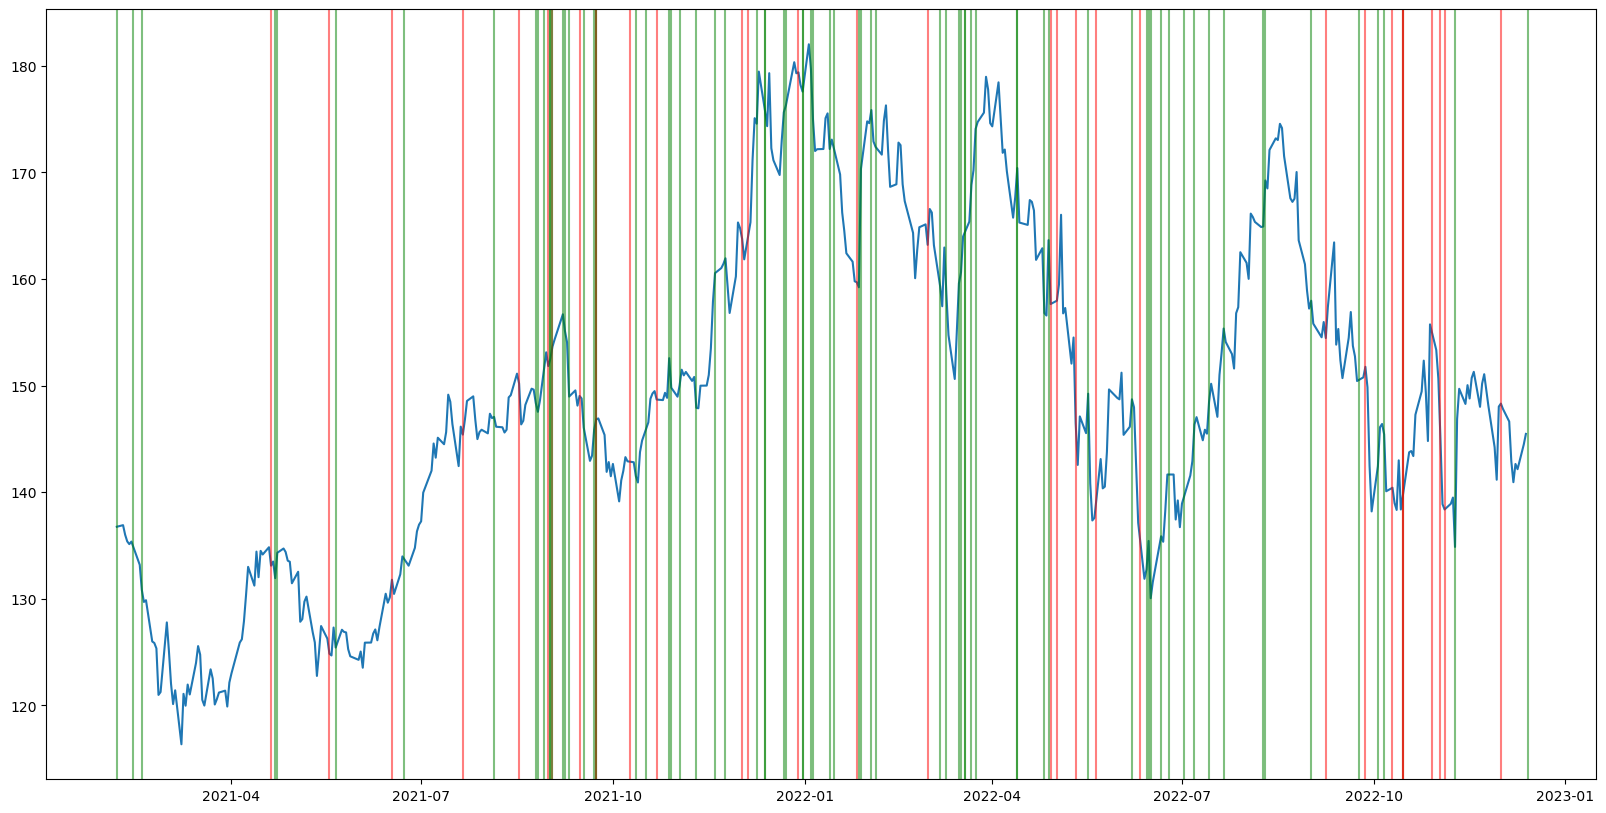

In [201]:
APPL_sample_df['published'] = pd.to_datetime(APPL_sample_df['published'])
#get the first date and last date of published news
min_published = APPL_sample_df['published'].min()
max_published = APPL_sample_df['published'].max()


#import apple stock data from yahoo finance and filter to keep only data between min and max published date
import yfinance as yf
import seaborn as sns
AAPL_stock_df = yf.download('AAPL', start=min_published, end=max_published, progress=True)
AAPL_stock_df.reset_index(inplace=True)


#Put on the stocks plot a vertical line for each news published date, green for positive news and red for negative news
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(AAPL_stock_df['Date'], AAPL_stock_df['Close'])
for index, row in APPL_sample_df.iterrows():
    if row['sentiment'] == 'negative':
        ax.axvline(row['published'], color='red', alpha=0.5)
    else:
        ax.axvline(row['published'], color='green', alpha=0.5)

,Open,High,Low,Close,Adj Close,Volume,strategy
Date,,,,,,,
2021-02-05,137.350006,137.419998,135.860001,136.759995,134.764709,75693800,1145.470001
2021-02-08,136.029999,136.960007,134.919998,136.910004,134.912552,71297200,1145.470001
2021-02-09,136.619995,137.880005,135.850006,136.009995,134.025696,76774200,1145.470001
2021-02-10,136.479996,136.990005,134.399994,135.389999,133.414719,73046600,1145.470001
2021-02-11,135.899994,136.389999,133.770004,135.130005,133.158524,64280000,1145.470001
...,...,...,...,...,...,...,...
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.341248,69721100,6818.800049
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.043976,62128300,6818.800049
2022-12-09,142.339996,145.570007,140.899994,142.160004,141.556076,76097000,6818.800049


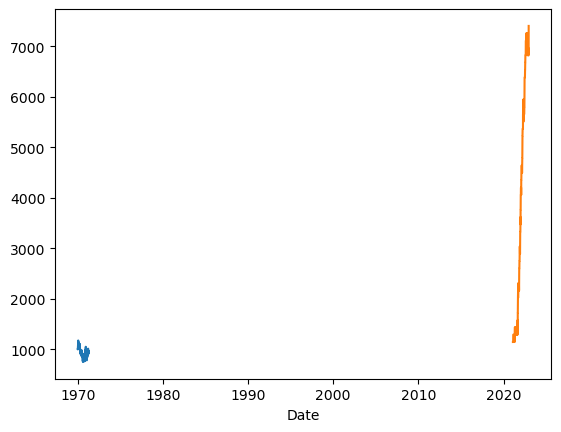

In [206]:
#Let follow a simple trading strategy, start wtih 1000$ and buy 1 stock when we have a positive news and sell 1 stock when we have a negative news
#We will compare this strategy with a buy and hold strategy
#Buy and hold strategy
buy_and_hold_df = AAPL_stock_df.copy()
buy_and_hold_df['buy_and_hold'] = buy_and_hold_df['Close'].apply(lambda x: 1000/x)
buy_and_hold_df['buy_and_hold'] = buy_and_hold_df['buy_and_hold'] * buy_and_hold_df['Close'].iloc[0]
buy_and_hold_df['buy_and_hold'].plot()




#Trading strategy, if the date in the stock data do not match the date in the news data, we will use the last date
APPL_stock_df = AAPL_stock_df.copy()

APPL_stock_df['Date'] = APPL_stock_df['Date'].dt.date
APPL_stock_df.set_index('Date', inplace=True)
APPL_stock_df['strategy'] = 0
APPL_stock_df['strategy'] = APPL_stock_df['strategy'].astype(float)
for index, row in APPL_sample_df.iterrows():
    if row['sentiment'] == 'negative':
        #if the published date is not in the stock data, we will use the last date
        if row['published'] not in APPL_stock_df.index:
            APPL_stock_df.loc[APPL_stock_df.index[-1], 'strategy'] -= 1
        else:
            APPL_stock_df.loc[row['published'], 'strategy'] -= 1
    else:
        #if the published date is not in the stock data, we will use the last date
        if row['published'] not in APPL_stock_df.index:
            APPL_stock_df.loc[APPL_stock_df.index[-1], 'strategy'] += 1
        else:
            APPL_stock_df.loc[row['published'], 'strategy'] += 1

APPL_stock_df['strategy'] = APPL_stock_df['strategy'].cumsum()
APPL_stock_df['strategy'] = APPL_stock_df['strategy'].apply(lambda x: 1000 + x*APPL_stock_df['Close'].iloc[-1])
APPL_stock_df['strategy'].plot()
        
APPL_stock_df

In [188]:
AAPL_stock_df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,137.350006,137.419998,135.860001,136.759995,134.764725,75693800
2021-02-08,136.029999,136.960007,134.919998,136.910004,134.912552,71297200
2021-02-09,136.619995,137.880005,135.850006,136.009995,134.025665,76774200
2021-02-10,136.479996,136.990005,134.399994,135.389999,133.414703,73046600
2021-02-11,135.899994,136.389999,133.770004,135.130005,133.158508,64280000
...,...,...,...,...,...,...
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.341248,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.043976,62128300
2022-12-09,142.339996,145.570007,140.899994,142.160004,141.556061,76097000


In [195]:
AAPL_stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,137.350006,137.419998,135.860001,136.759995,134.764740,75693800
2021-02-08,136.029999,136.960007,134.919998,136.910004,134.912537,71297200
2021-02-09,136.619995,137.880005,135.850006,136.009995,134.025681,76774200
2021-02-10,136.479996,136.990005,134.399994,135.389999,133.414703,73046600
2021-02-11,135.899994,136.389999,133.770004,135.130005,133.158539,64280000
...,...,...,...,...,...,...
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.341248,69721100
2022-12-08,142.360001,143.520004,141.100006,142.649994,142.043976,62128300
2022-12-09,142.339996,145.570007,140.899994,142.160004,141.556076,76097000
